# Running Tabular Benchmarks on DLGN and Decision Tree Algorithms

We shall be using the Tabular Benchmarks to train models on binary classification tasks. We shall be using the following models:

- DLGN
- TAO
- Latent Trees
- Locally Constant Networks

## Imports

In [45]:
%load_ext autoreload
%autoreload 2
import dlgn
from data_gen import Args, data_gen_decision_tree 
import openml
import numpy as np
import dlgn, lcn, latent, tao, kernel
from sklearn.preprocessing import StandardScaler

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
SUITE_ID = 337

In [3]:
benchmark_suite = openml.study.get_suite(SUITE_ID)  

## Task 1

In [4]:
task = openml.tasks.get_task(benchmark_suite.tasks[0])

/home/sooraj/.local/lib/python3.11/site-packages/IPython/core/interactiveshell.py:3508: FutureWarning: Starting from Version 0.15.0 `download_splits` will default to ``False`` instead of ``True`` and be independent from `download_data`. To disable this message until version 0.15 explicitly set `download_splits` to a bool.
  exec(code_obj, self.user_global_ns, self.user_ns)
/home/sooraj/.local/lib/python3.11/site-packages/openml/tasks/functions.py:442: FutureWarning: Starting from Version 0.15 `download_data`, `download_qualities`, and `download_features_meta_data` will all be ``False`` instead of ``True`` by default to enable lazy loading. To disable this message until version 0.15 explicitly set `download_data`, `download_qualities`, and `download_features_meta_data` to a bool while calling `get_dataset`.
  dataset = get_dataset(task.dataset_id, *dataset_args, **get_dataset_kwargs)


In [5]:
task

OpenML Classification Task
Task Type Description: https://www.openml.org/tt/TaskType.SUPERVISED_CLASSIFICATION
Task ID..............: 361055
Task URL.............: https://www.openml.org/t/361055
Estimation Procedure.: crossvalidation
Evaluation Measure...: predictive_accuracy
Target Feature.......: SeriousDlqin2yrs
# of Classes.........: 2
Cost Matrix..........: Available

In [6]:
dataset = task.get_dataset()

/home/sooraj/.local/lib/python3.11/site-packages/openml/tasks/task.py:150: FutureWarning: Starting from Version 0.15 `download_data`, `download_qualities`, and `download_features_meta_data` will all be ``False`` instead of ``True`` by default to enable lazy loading. To disable this message until version 0.15 explicitly set `download_data`, `download_qualities`, and `download_features_meta_data` to a bool while calling `get_dataset`.
  return datasets.get_dataset(self.dataset_id)


In [7]:
# TODO: shuffle the dataset
X, y, _, _ = dataset.get_data(target=task.target_name)

In [26]:
np.random.seed(42)
rng = np.random.permutation(X.shape[0])
scaler = StandardScaler()

In [33]:
data_x, labels = scaler.fit_transform(X), y.to_numpy().astype(int)
data_x, labels = data_x[rng], labels[rng]

In [34]:
num_data = len(data_x)
num_vali = (num_data*9)//100
num_train= (num_data*7)//10
num_test = (num_data*21)//100
train_data = data_x[:num_train,:]
train_data_labels = labels[:num_train]

vali_data = data_x[num_train:num_train+num_vali,:]
vali_data_labels = labels[num_train:num_train+num_vali]

test_data = data_x[num_train+num_vali :,:]
test_data_labels = labels[num_train+num_vali :]

In [38]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(max_depth=6)
model.fit(train_data, train_data_labels)
kkkkkkkkkk(model.predict(train_data) == train_data_labels).sum()/train_data_labels.shape[0]

0.7710060688947773

In [47]:
args = Args()
args.input_dim = 10
model = dlgn.trainDLGN(args)

  0%|          | 0/2048 [00:00<?, ?it/s]

100%|██████████| 2048/2048 [05:13<00:00,  6.53it/s]


Setup:
Num neurons :  [10, 50, 50, 50, 50, 1]
 Beta : 3.0
 lr : 0.001
[0.7, 0.6892640173435212, 0.6703642904758453, 0.6527506351470947, 0.6372362315654755, 0.6127770960330963, 0.5645565629005432, 0.5373980045318604, 0.5342530310153961, 0.5287429869174958, 0.524563068151474, 0.521521931886673, 0.5195552170276642, 0.5179897725582123, 0.5169424951076508, 0.5161235272884369, 0.5152257442474365, 0.5078061342239379, 0.5023089438676834, 0.49221666157245636, 0.4590890407562256, 0.402569106221199, 0.32240510880947115]
==========Best validated model=============
Train error= 2680
Train loss =  tensor(0.4803, grad_fn=<NllLossBackward0>)
Num_train_data= 11699
Test error= 874
Num_test_data= 3511


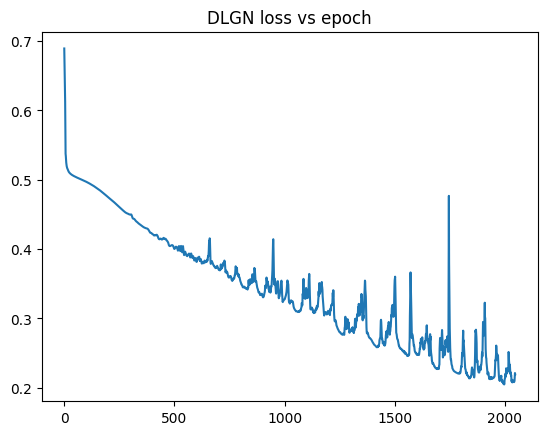

In [48]:
model.train(train_data, train_data_labels, vali_data, vali_data_labels, test_data, test_data_labels)

In [43]:
model = latent.trainLatentTree(args)
model.train(train_data, train_data_labels, vali_data, vali_data_labels, test_data, test_data_labels)

Current depth: 5


  0%|          | 0/1000 [00:00<?, ?it/s]

train loss 0.49886698: 100%|██████████| 1000/1000 [05:38<00:00,  2.95it/s]


0.6928191489361702 0.684420393050413
Best depth: 5
Train acc 0.6947602359175998
Test acc 0.684420393050413


In [44]:
model = lcn.trainLCN(args)
model.train(train_data, train_data_labels, vali_data, vali_data_labels, test_data, test_data_labels)

/home/sooraj/.local/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:139: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  warnings.warn("Detected call of `lr_scheduler.step()` before `optimizer.step()`. "
/home/sooraj/.local/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:152: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use c

KeyboardInterrupt: 

In [46]:
model = kernel.trainSVM(args)
model.train(train_data, train_data_labels, vali_data, vali_data_labels, test_data, test_data_labels)

{'C': 1000, 'gamma': 0.1, 'kernel': 'rbf'}
0.7507476348647789
Train accuracy: 0.7879305923583212
Validation accuracy: 0.745345744680851
Test accuracy: 0.7416690401594987
